In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

#### Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [5]:
# Загружаем данные
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
# Преобразуем данные в dataframe
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


#### Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [7]:
# Оставляем нужные переменные
df = df[['sepal length (cm)', 'sepal width (cm)', 'species']]
# Изменяем названия столбцов
df = df.rename(columns={'sepal length (cm)': 'sepal_length', 
                  'sepal width (cm)': 'sepal_width',
                  'species': 'variety'})

In [8]:
df.head()

,sepal_length,sepal_width,variety
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [9]:
# Проверим данные на пропуски
df.isna().sum()

sepal_length    0
sepal_width     0
variety         0
dtype: int64

#### Разделите данные на выборку для обучения и тестирования

In [10]:
y = df['variety']
X = df[['sepal_length', 'sepal_width']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Постройте модель LDA

In [11]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [12]:
# Делаем предсказание
pred_test = model.predict(X_test)

In [13]:
# Смотрим точность
print(accuracy_score(y_test, pred_test))

0.7666666666666667


In [14]:
# Смотрим статистику модели
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.75      0.69      0.72        13
   virginica       0.43      0.50      0.46         6

    accuracy                           0.77        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.78      0.77      0.77        30



<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

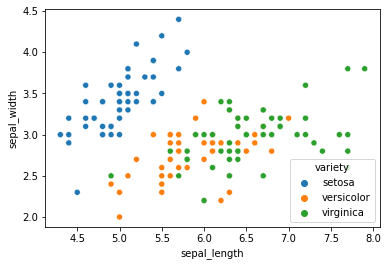

In [15]:
# Изобразим датасет на графике
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='variety')

In [16]:
# Видно, что вид setosa классифицировать проще, чем versicolor и virginica

#### Визуализируйте предсказания для тестовой выборки и центры классов

In [17]:
X_test.head()

,sepal_length,sepal_width
114,5.8,2.8
62,6.0,2.2
33,5.5,4.2
107,7.3,2.9
7,5.0,3.4


In [18]:
# Добавим к X_test наши предсказания
X_test['variety'] = pred_test

C:\Users\Amir\AppData\Local\Temp/ipykernel_21492/615873220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['variety'] = pred_test


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

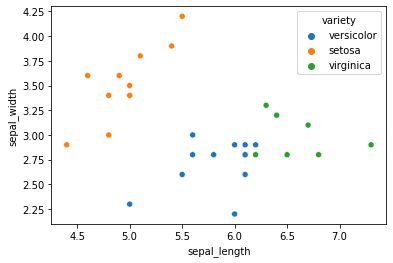

In [19]:
plt.subplot()
sns.scatterplot(data=X_test, x='sepal_length', y='sepal_width', hue='variety')

#### Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [20]:
df.head()

,sepal_length,sepal_width,variety
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [21]:
df1 = df[['sepal_length', 'sepal_width']]
df1.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


#### Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [22]:
# Список для записи ответов в цикле
results = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state=1, n_init=10)
    kmeans.fit(df1)
    results.append(kmeans.inertia_) # inertia_ - это сумма квадратов растояний между точками в кластере

C:\Users\Amir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


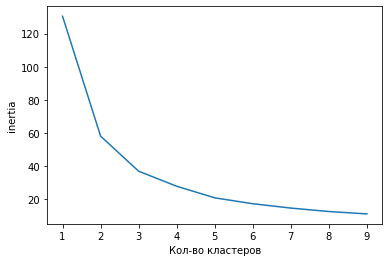

In [23]:
# Метод локтя
plt.plot(range(1, 10), results)
plt.xlabel('Кол-во кластеров')
plt.ylabel('inertia')
plt.show()
# Сложно понять оптимальное число (2 или 3)

In [24]:
# Для 2 классов
kmeans = KMeans(n_clusters = 2, n_init = 10, random_state = 1)
y_kmeans = kmeans.fit_predict(df1)

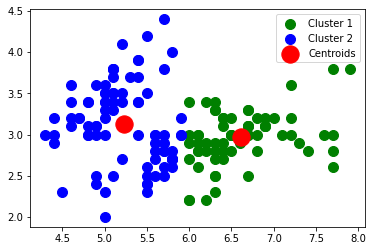

In [25]:
plt.scatter(df1[y_kmeans == 0]['sepal_length'], df1[y_kmeans == 0]['sepal_width'], s = 100 \
            , c = 'green', label = 'Cluster 1')
plt.scatter(df1[y_kmeans == 1]['sepal_length'], df1[y_kmeans == 1]['sepal_width'], s = 100 \
            , c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'red', label = 'Centroids')
plt.legend()

In [26]:
# Для 3 классов
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 1)
y_kmeans = kmeans.fit_predict(df1)

In [29]:
y_kmeans == 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

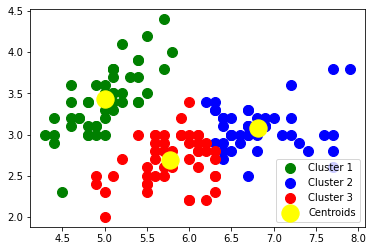

In [28]:
plt.scatter(df1[y_kmeans == 0]['sepal_length'], df1[y_kmeans == 0]['sepal_width'], s = 100 \
            , c = 'green', label = 'Cluster 1')
plt.scatter(df1[y_kmeans == 1]['sepal_length'], df1[y_kmeans == 1]['sepal_width'], s = 100 \
            , c = 'blue', label = 'Cluster 2')
plt.scatter(df1[y_kmeans == 2]['sepal_length'], df1[y_kmeans == 2]['sepal_width'], s = 100 \
            , c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()